# Caracterização meteorológica da área de estudo
Autor: Leonardo Hoinaski

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade



## Meteorologia de superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .\
Faça seu login e colete o dado para o período de 01/01/2023 a 01/01/2024.\
Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv


In [1]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Leonardo.Hoinaski\Documents\ENS5173_202401
C:\Users\Leonardo.Hoinaski\Documents\ENS5173_202401\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [2]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [3]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 26251, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


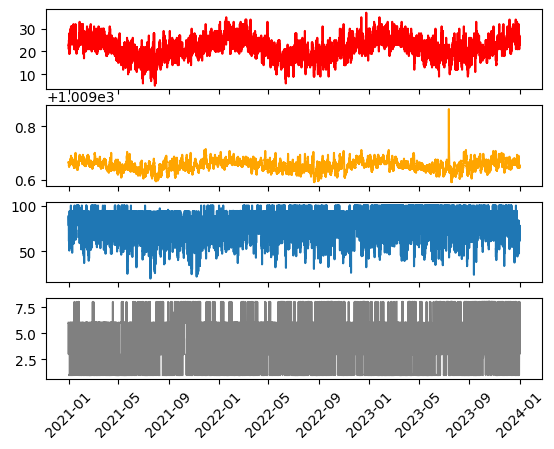

In [4]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da cco é:1009.6967607391396


{'whiskers': [<matplotlib.lines.Line2D at 0x21e6dc1f850>,
 'caps': [<matplotlib.lines.Line2D at 0x21e6dc18f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e6dc29bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e6dc1a510>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e6dc1b050>],
 'means': []}

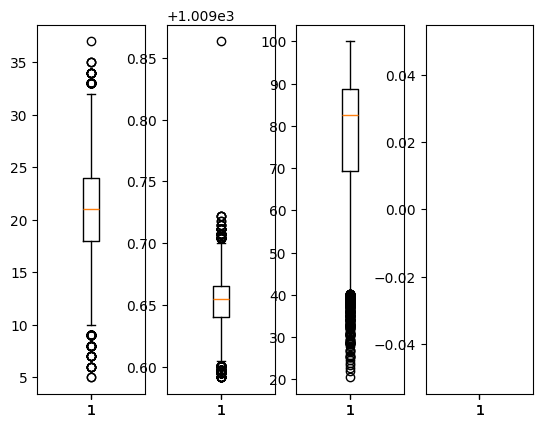

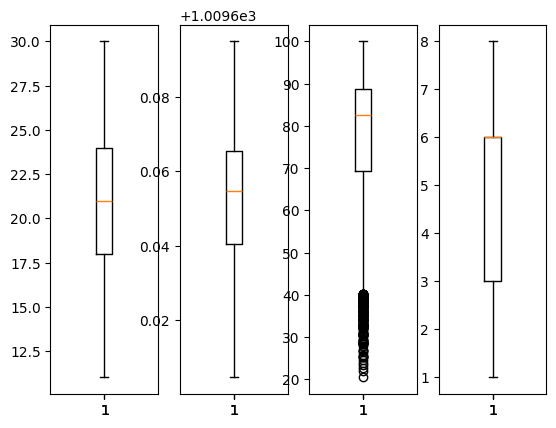

In [39]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:'+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:'+str(p99))
#print(metSuperficie['temp']<temp99)
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é:'+str(p99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])


C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_23628\3580486198.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_23628\3580486198.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()


            day  month  year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                             
2021-01-31    1      1  2021     0 NaN  0.0  0.0  213.36  1.0  1.0   
2021-02-28    1      2  2021     0 NaN  0.0  0.0  243.84  1.0  1.0   
2021-03-31    1      3  2021     0 NaN  0.0  0.0  213.36  1.0  1.0   
2021-04-30    1      4  2021     0 NaN  0.0  0.0  182.88  1.0  1.0   
2021-05-31    1      5  2021     0 NaN  0.0  0.0  243.84  1.0  1.0   
2021-06-30    1      6  2021     0 NaN  0.0  0.0  182.88  1.0  1.0   
2021-07-31    1      7  2021     0 NaN  0.0  0.0   30.48  1.0  1.0   
2021-08-31    1      8  2021     0 NaN  0.0  0.0   30.48  1.0  1.0   
2021-09-30    1      9  2021     0 NaN  0.0  0.0  152.40  1.0  1.0   
2021-10-31    1     10  2021     0 NaN  0.0  0.0   91.44  1.0  1.0   
2021-11-30    1     11  2021     0 NaN  0.0  0.0  213.36  1.0  1.0   
2021-12-31    1     12  2021     0 NaN  0.0  0.0  304.80  1.0  1.0   
2022-01-31    1     

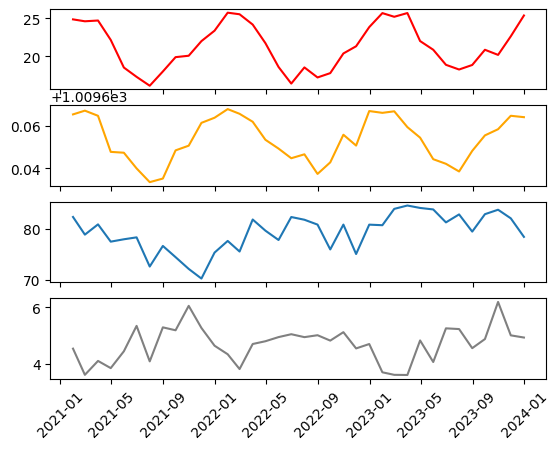

In [47]:
# Estatísticas dos dados
#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

print(min_mensal)

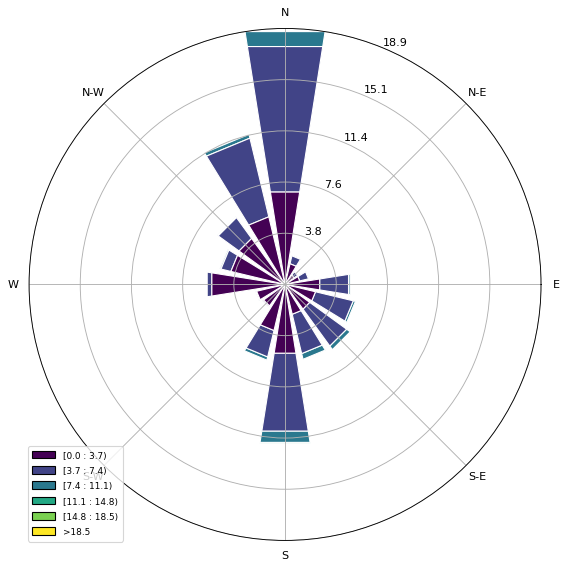

In [48]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()



# Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [62]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

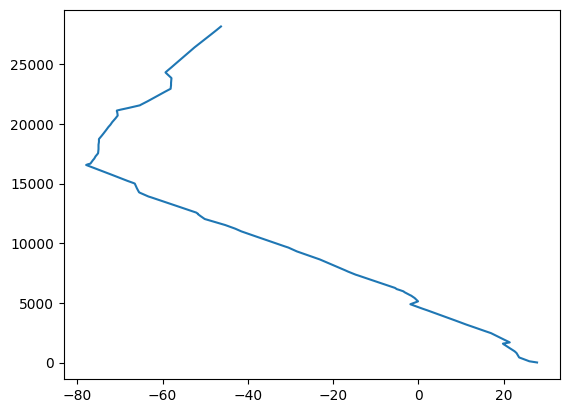

In [63]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

[-1.8        -0.74303406 -0.16574586 -0.30075188 -0.35714286 -0.43613707
 -0.42857143 -0.48780488 -0.32786885  1.53846154 -0.57416268 -0.56338028
 -0.82191781 -0.80139373 -0.80701754 -0.75362319 -0.77014218 -0.81481481
 -0.7651715   0.75675676  0.70175439 -0.28409091 -0.28846154 -0.41322314
 -0.39473684 -0.66666667 -0.52830189 -0.31746032 -0.80357143 -0.86419753
 -0.40816327 -0.82969432 -0.83003953 -0.82687339 -0.82417582 -0.89285714
 -0.69498069 -0.61946903 -0.65265487 -0.79881657 -0.61919505 -0.85106383
 -0.85106383 -0.81188119 -0.81325301 -0.80378251 -0.63636364 -0.71428571
 -0.77192982 -0.9486166  -0.40160643 -0.375       0.         -0.40816327
 -0.82568807 -0.82833133 -0.8974359  -0.63492063 -0.5        -0.15060241
 -0.12626263 -0.66666667 -0.77777778 -0.71969697 -0.73200993  0.71428571
  1.05263158  0.20338983  0.24390244  0.15873016  0.23255814  0.22556391
  0.          0.02941176  0.          0.          0.04291845  0.
  0.234375    0.2247191   0.2166065   0.20833333  0.2040816

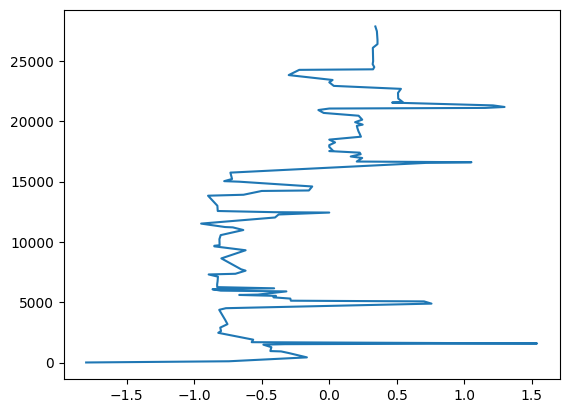

In [64]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

# Análise de dados no espaço
Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

['Best GFS Quarter Degree Forecast Time Series']
['time1', 'latitude', 'reftime1', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


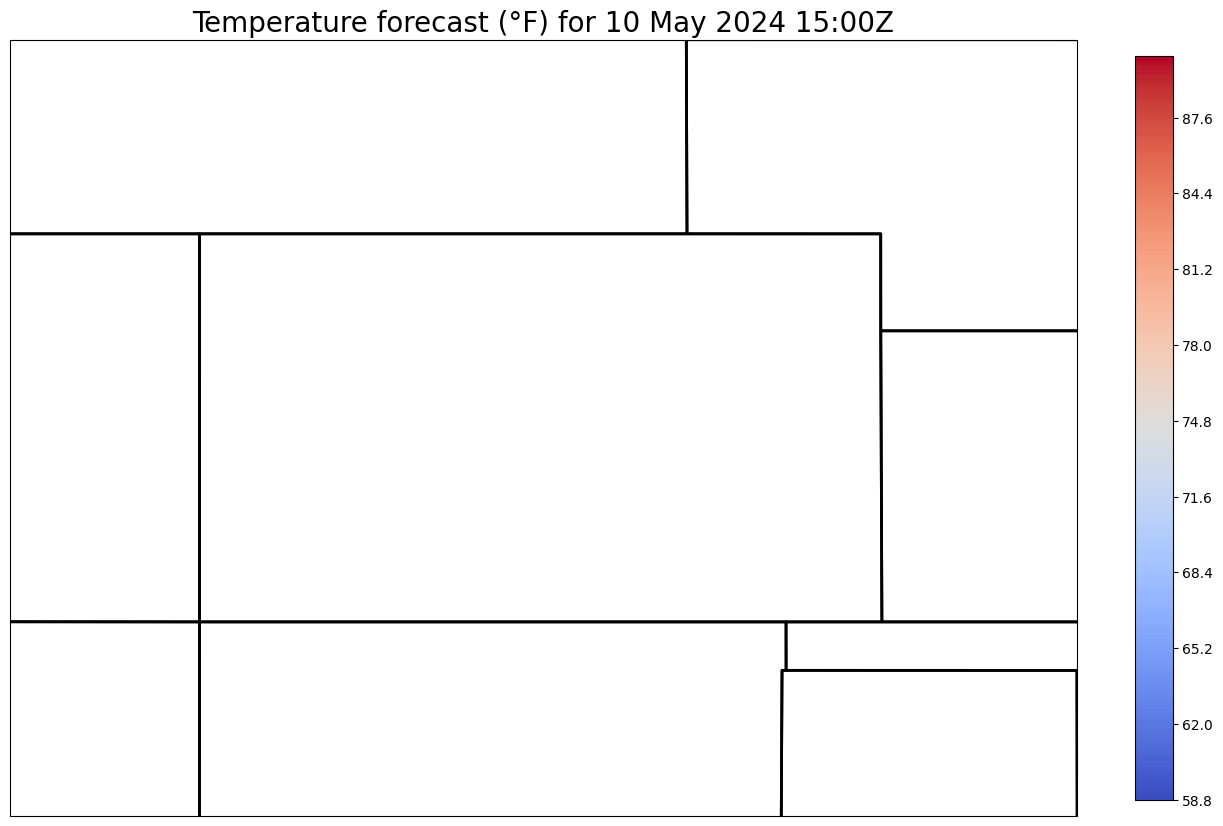

In [71]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100., -111., 35, 43])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')